# LoC Data Package Tutorial: General Collections Assessment

This notebook will demonstrate basic usage of using Python for interacting with [data packages from the Library of Congress](https://data.labs.loc.gov/packages/) via the [General Collections Assessment Data Package](https://data.labs.loc.gov/gen-coll-assessment/) which is derived from an ongoing program to assess the Library's approximately 22 million books, bound serials and other materials classified under the [General Collections](https://www.loc.gov/rr/coll-general.html). We will:

1. [Read and query metadata from a data package](#Query-the-metadata-in-a-data-package)
2. [Visualize the data](#Visualize-the-data)

## Prerequisites

In order to run this notebook, please follow the instructions listed in [this directory's README](https://github.com/LibraryOfCongress/data-exploration/blob/master/Data%20Packages/README.md).

## Query the metadata in a data package

First we will download a the Children's Literature assessment metadata file, print a summary of the items' location values, then filter by a particular location.

In [2]:
import io

import pandas as pd                     # for reading, manipulating, and displaying data
import requests

DATA_URL = 'https://data.labs.loc.gov/gen-coll-assessment/'

metadata_url = f'{DATA_URL}chi.csv' # Also try 'localhistory_us.csv' or 'philosphy.csv'
response = requests.get(metadata_url, timeout=60)
metadata_string = response.text

# Read contents as a csv file
df = pd.read_csv(io.StringIO(metadata_string), dtype=str, keep_default_na=False)
print(f'Loaded metadata file with {df.shape[0]:,} entries.')

Loaded metadata file with 331,145 entries.


Next let's print the available properties

In [3]:
print(', '.join(df.columns.to_list()))

ï»¿Lccn, Title, Author, Publisher, Language, Begin Publication Date, Format, Country, Display Call Number, Holdings Location Display Name, Holdings Location, Begin Publication Date (Decade), Region, Subclass, US NonUS, Isbn, Issn, Language Code, Place Code, Place of Publication, State or Country


Next print the top 10 most frequent locations in this dataset

In [4]:
# Since "State_region" are a list, we must "explode" it so there's just one state/region per row
# We convert to DataFrame so it displays as a table
df['State or Country'].value_counts().iloc[:10].to_frame()

,State or Country
New York (State),164607
Massachusetts,22867
Illinois,12702
Minnesota,11068
California,11065
England,11012
Pennsylvania,9800
"No place, unknown, or undetermined",8803
Germany,4611
Wisconsin,4341


Now we filter the results to only those items with location "Wisconsin"

In [5]:
subset = df[df['State or Country'] == 'Wisconsin']
print(f'Found {subset.shape[0]:,} items with location "Wisconsin"')

Found 4,341 items with location "Wisconsin"


## Visualize the data

Finally we will visualize the location data on a map.

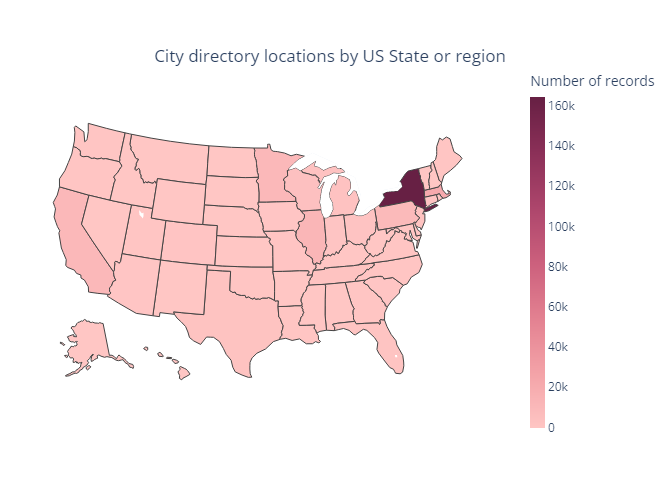

In [6]:
from collections import Counter
from IPython.display import Image
import plotly.express as px         # For displaying charts and graphs

us_state_to_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "New York (State)": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "Washington (State)": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC", "American Samoa": "AS",
    "Guam": "GU", "Northern Mariana Islands": "MP", "Puerto Rico": "PR", "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI"
}

locations = df['State or Country'] # Get a list of all the states/regions
locations_abbrev = [us_state_to_abbrev[loc] for loc in locations if loc in us_state_to_abbrev.keys()] # Convert to abbreviations
counter = Counter(locations_abbrev) # Count them
location_list = list(counter.keys())
counts = list(counter.values())

# Visualize it on a map
fig = px.choropleth(locations=location_list, locationmode="USA-states", color=counts, scope="usa",
                        color_continuous_scale=px.colors.sequential.Burg, labels={'color': 'Number of records'})
fig.update_layout(
        title=dict(text=f'City directory locations by US State or region', yanchor='top', xanchor='center', y=.9, x=.5),
        margin=dict(l=0, r=0, t=0, b=0, pad=0),
        coloraxis=dict(colorbar=dict(thickness=15, len=.75, xpad=5)),
        width=660
    )
Image(fig.to_image(format="png"))


